# Loan Application Status Prediction

#### Problem statement:
We are building  a model that can predict whether the loan of the applicant will be approved(Loan_status) or not on the basis of the details provided in the dataset.


##### Project Description

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 
Independent Variables:

- Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases
- Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis     of their reproductive functions
- Married - This refers to applicant being in a state of matrimony
- Dependents - This refres to persons who depends on the applicants for survival
- Education - This refers to number of years in which applicant received systematic instruction, especially at a school or       university
- Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an     employer
- Applicant Income - This refers to disposable income available for the applicant's use under State law.
- CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application         process alongside the main applicant use under State law.
- Loan_Amount - This refers to the amount of money an applicant owe at any given time.
- Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant
- Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying     them.
- Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.
- Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested.
 


# Importing necessary Libraries 

In [227]:
import pandas as pd 
import numpy as np
from sklearn import metrics 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

# Loading Data set 

In [228]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


The above data frame table shows the first 5 rows and last five rows of the datasets. We can observed some categorical and numerical columns, and Nan values but I will get clarification as will move on. 

In [229]:
# Statistical summary of the numerical data
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


The above table shows the statistical summary of the numerical data. 
Counts result shows that data in LoanAmount, Loan_Amount_Term and Credit_History there are missing values, counts no complete. 

The STD value is bigger than the mean value in ApplicantIncome and almst same in Credit_History.

The Min CoalicationIncome is showing 0 value, also in Credit_History

25%,50%,75% and Max values in Credit_History columns are same,observing outliers. 


In [230]:
data.shape

(614, 13)

Dimension of the data is 614 rows and 13 columns. 12 columns belongs to data features and 1 column(loan status) is the target variable 

# Exploratory Data Analysis(EDA)

In [231]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

According to the data types  result, we can seen clearly that 8 columns are object data including our target variable which makes it a classification problem. 
4 columns are float data types and one column is int64. 

In [232]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


According to the discriptive information of the data, The RangeIndex is 614 entries, data columns 13, float data(4), int64(1),object(8), memory usage 62.5+ KB

# Checking missing values 

In [233]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

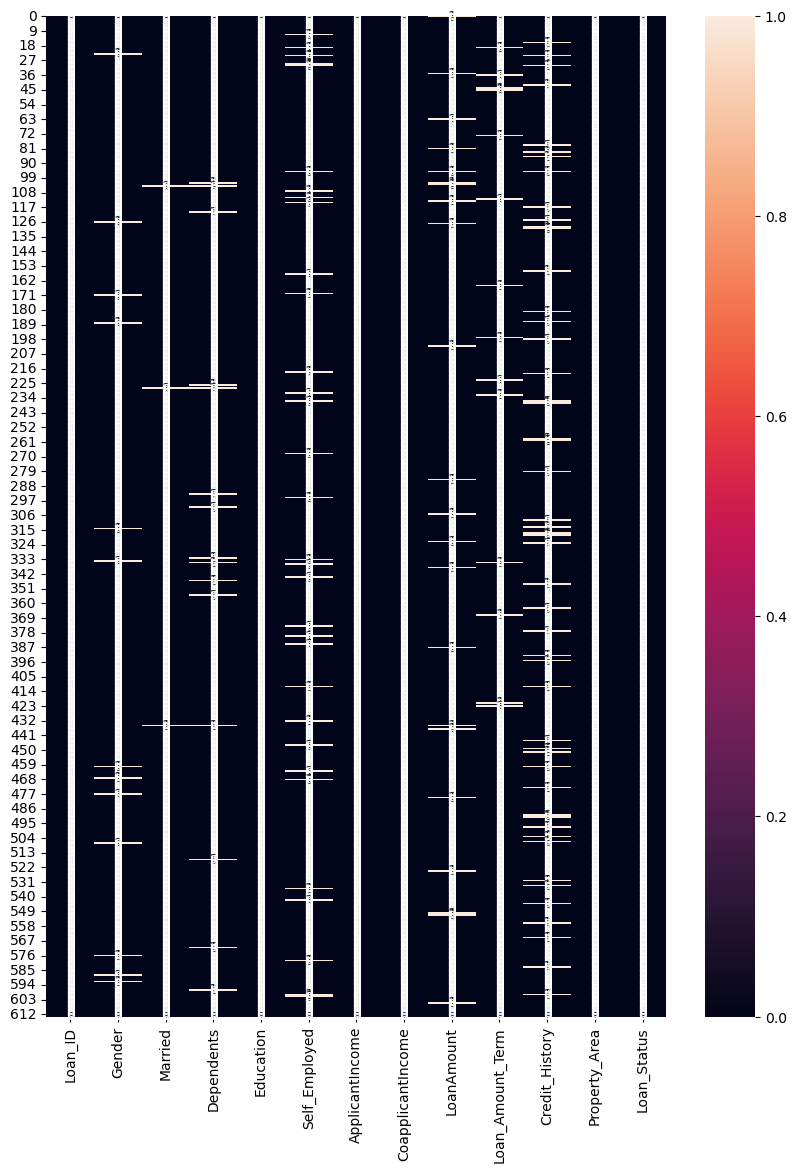

In [234]:
# Using simple heatmap to visualize the nulls values 
plt.figure(figsize=(10,13))
sns.heatmap(data.isnull(),annot=True)
plt.show()

- Gender column 13 missing values
- Dependents column 15 missing values 
- self_employed column 32 missing values 
- LoanAmount column 22 missing values 
- Loan_Amount_Term column 14 missing values 
- credit_History column 50 missing values  

In [235]:
# dropping duplicates 
data.drop_duplicates(inplace = True )
print(data.shape)

(614, 13)


In [236]:
data.nunique().to_frame()

,0
Loan_ID,614
Gender,2
Married,2
Dependents,4
Education,2
Self_Employed,2
ApplicantIncome,505
CoapplicantIncome,287
LoanAmount,203
Loan_Amount_Term,10


These are the unqiue values for each columns. 

# Checking counts values of all columns 

In [237]:
# Checking values counts before dropping irrelevant columns 
for i in  data:
    print(data[i].value_counts)
    print('*'*75)

<bound method IndexOpsMixin.value_counts of 0      LP001002
1      LP001003
2      LP001005
3      LP001006
4      LP001008
         ...   
609    LP002978
610    LP002979
611    LP002983
612    LP002984
613    LP002990
Name: Loan_ID, Length: 614, dtype: object>
***************************************************************************
<bound method IndexOpsMixin.value_counts of 0        Male
1        Male
2        Male
3        Male
4        Male
        ...  
609    Female
610      Male
611      Male
612      Male
613    Female
Name: Gender, Length: 614, dtype: object>
***************************************************************************
<bound method IndexOpsMixin.value_counts of 0       No
1      Yes
2      Yes
3      Yes
4       No
      ... 
609     No
610    Yes
611    Yes
612    Yes
613     No
Name: Married, Length: 614, dtype: object>
***************************************************************************
<bound method IndexOpsMixin.value_counts of 0       0
1      

# Dropping unwanted column

In [238]:
data.drop(['Loan_ID'],axis=1,inplace =True)
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Loan ID has been dropped from our data. Reason, column have no value in my model prediction. 

In [239]:
data.shape

(614, 12)

we have 12 columns after dropping Loan ID column.

# Treating Nans values in all columns 

In [240]:
# using fillna to treat missing values
data['Gender'] =data['Gender'].fillna(data['Gender'].mode()[0])
data['Married'] =data['Married'].fillna(data['Married'].mode()[0])
data['Dependents'] =data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed'] =data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])
data['LoanAmount'] =data['LoanAmount'].fillna(data['LoanAmount'].mean())
data['Loan_Amount_Term'] =data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean())
data['Credit_History'] =data['Credit_History'].fillna(data['Credit_History'].mode()[0])
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

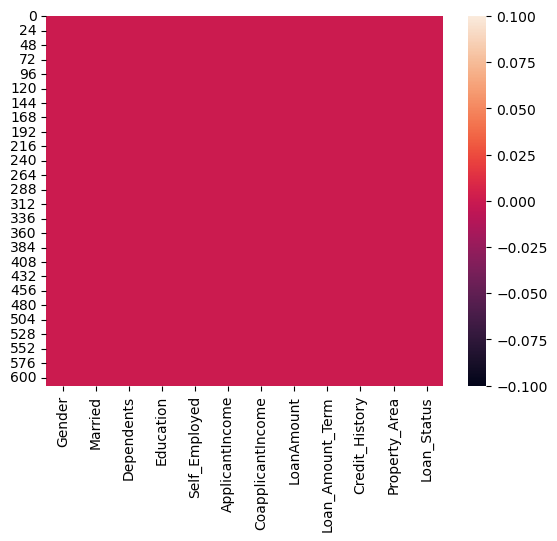

In [241]:
plt.figure()
sns.heatmap(data.isnull())
plt.show()

Nulls values has been treated in all columns. 

In [242]:
# Seperate object data type columns 
obj_columns = data.select_dtypes(include='object') 
obj_columns.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')

# Visualizing the Categorical columns

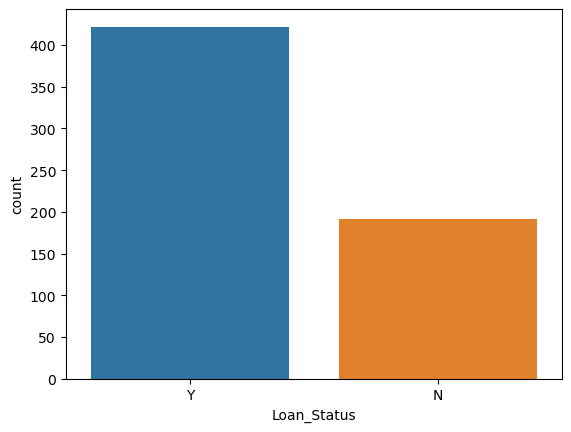

Y    422
N    192
Name: Loan_Status, dtype: int64


In [243]:
# Visualizing loan status 
sns.countplot(x='Loan_Status',data = data)
plt.show()

print(data['Loan_Status'].value_counts())

Applicants who are eligible for loan are 422 which is more than applicants who are not eligible  (192). 

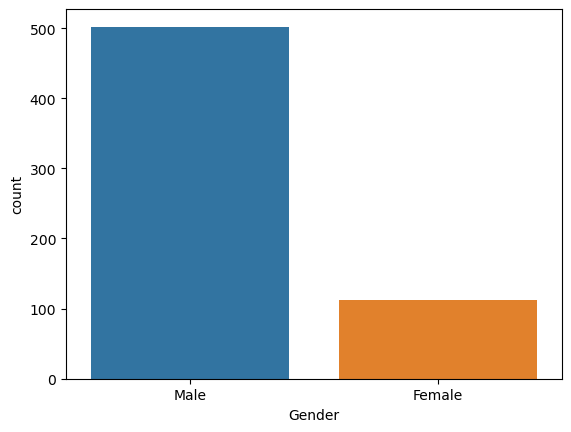

Male      502
Female    112
Name: Gender, dtype: int64


In [244]:
# Visualizing loan status 
sns.countplot(x='Gender',data = data)
plt.show()

print(data['Gender'].value_counts())

502 male applicants requested for loan

112 female applicants requested for loan.

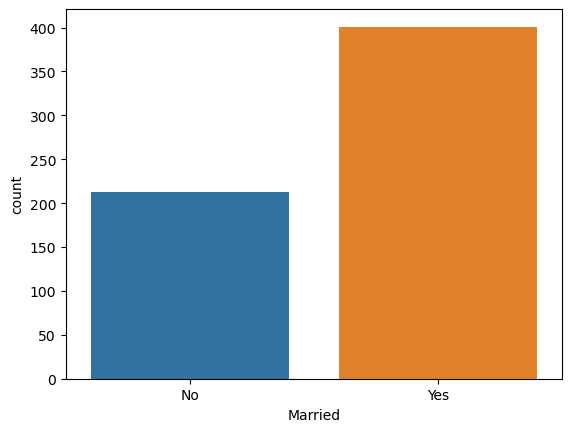

Yes    401
No     213
Name: Married, dtype: int64


In [245]:
# Visualizing Married 
sns.countplot(x='Married',data = data)
plt.show()

print(data['Married'].value_counts())

Applicants who are married are 401, which is higher than applicants who are not married, which is 213 

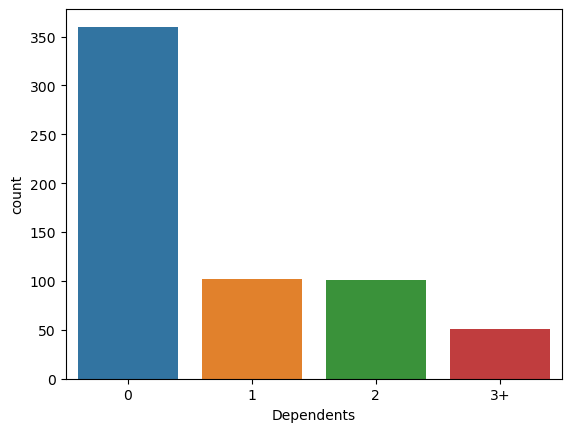

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


In [246]:
# Visualizing Dependents 
sns.countplot(x='Dependents',data = data)
plt.show()

print(data['Dependents'].value_counts())

Applicants who have no dependents to survival on them are more than applicants who have dependents that survival on them. 

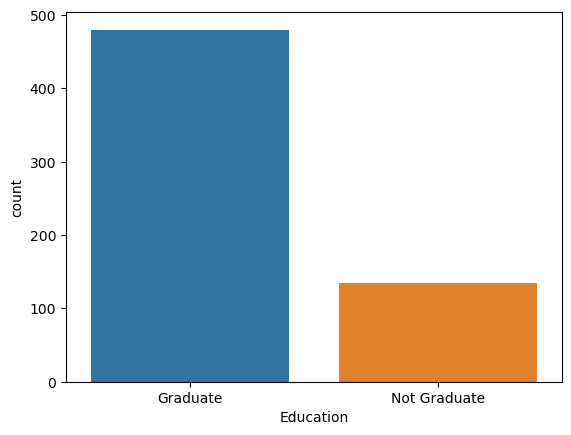

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


In [247]:
# Visualizing Education  
sns.countplot(x='Education',data = data)
plt.show()

print(data['Education'].value_counts())

Applicants who are graduate are more than applicants who are not graduates 

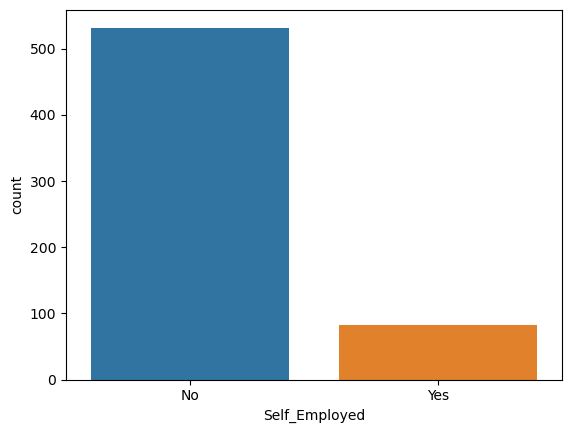

No     532
Yes     82
Name: Self_Employed, dtype: int64


In [248]:
# Visualizing Self employed 
sns.countplot(x='Self_Employed',data = data)
plt.show()

print(data['Self_Employed'].value_counts())

Applicants who are not freelancer or do not have their own businesses are more than applicants who are free lancer and have their own business 

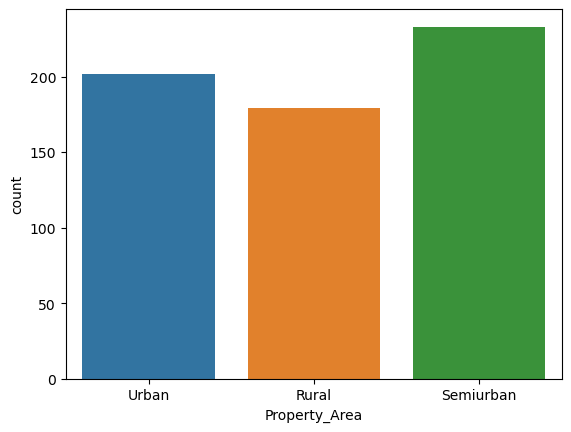

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


In [249]:
# Visualizing Property_Area 
sns.countplot(x='Property_Area',data = data)
plt.show()

print(data['Property_Area'].value_counts())

Applicants who lives in semiurban area are more than applicants who lives in Urban and Rural Property Area

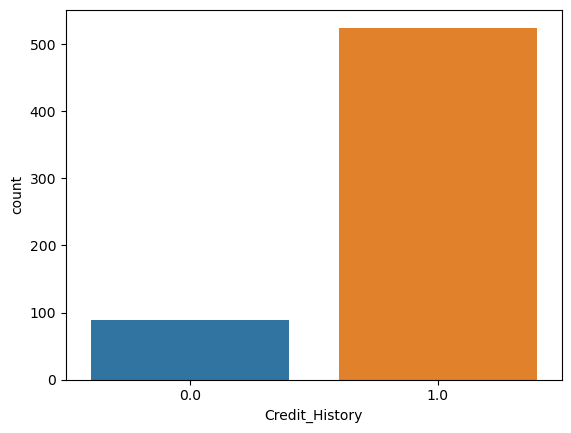

1.0    525
0.0     89
Name: Credit_History, dtype: int64


In [250]:
# Visualizing Property_Area 
sns.countplot(x='Credit_History',data = data)
plt.show()

print(data['Credit_History'].value_counts())

Applicants whose ability to repay debts is more than applicants who have defaulted that doesn't have the ability to pay debts

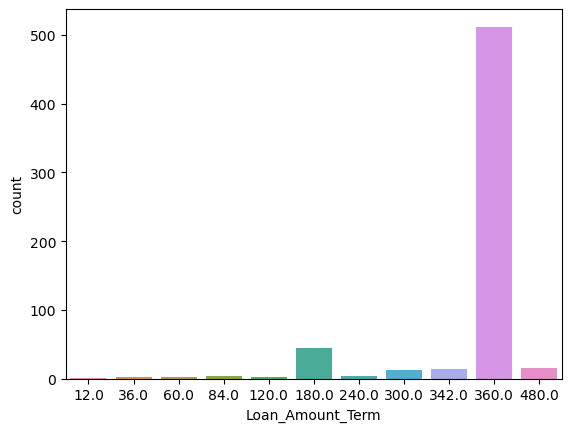

360.0    512
180.0     44
480.0     15
342.0     14
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


In [251]:
# Visualizing Loan_Amount_Term 
sns.countplot(x='Loan_Amount_Term',data = data)
plt.show()
print(data['Loan_Amount_Term'].value_counts())

90% of the applicants have the highest duration of loan amount term which is 360 available compare to other applicants duration.

# Multivariate Analysis(Visualizing more than one varaibles) 

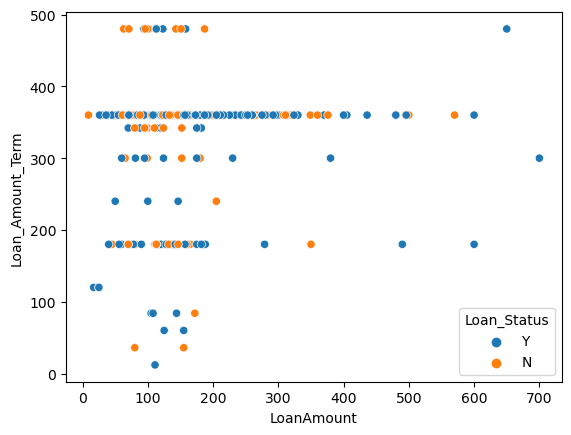

In [252]:
# Comparing between LoanAmount vs Loan_Amount_Term and checking their loan status
sns.scatterplot(x='LoanAmount',y='Loan_Amount_Term', data = data, hue='Loan_Status')
plt.show()

The above scatter plot shows that most of the data points falls between the loan term duration of 180 and 380 and appliants who eligible are more than applicants who are not eligible for loan amount ranges 50 to 700.

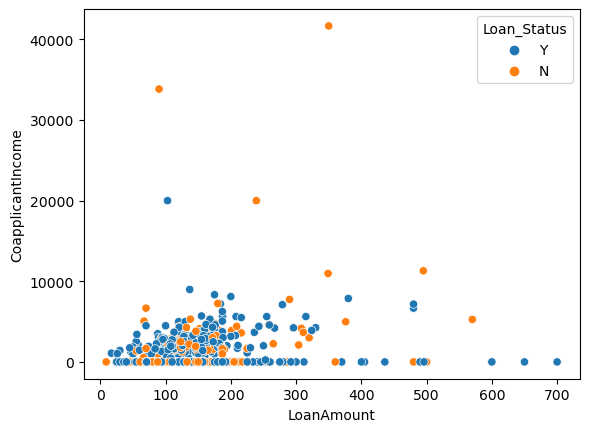

In [253]:
# Comparing between LoanAmount vs Coapplicantincome and checking their loan status
sns.scatterplot(x='LoanAmount',y ='CoapplicantIncome', data = data, hue='Loan_Status')
plt.show()

The above graph show comparison between coapplicantIncome and LoanAmount, as we can see people who participated with the principal applicant have low disposable income and most of this categories were eligible for low amount, only few of them were eligible for high income. However, few participates that have high disposable income above 30000 were not eligible.

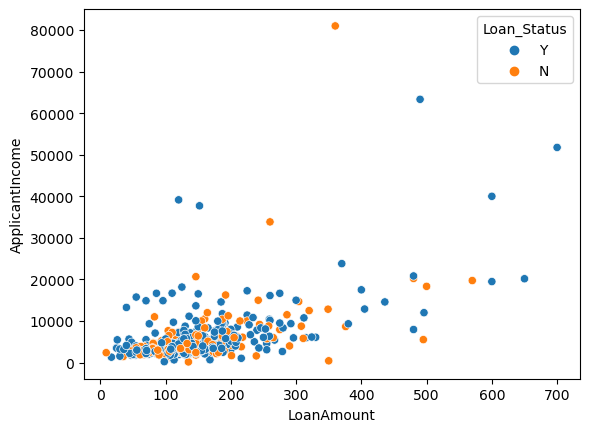

In [254]:
# Comparing between LoanAmount vs Applicant Income and checking their loan status
sns.scatterplot(x='LoanAmount',y ='ApplicantIncome', data = data, hue='Loan_Status')
plt.show()

The above gragh shows comparison between ApplicantIncome and Loan_Status. As we can see applicant with low disposable income from 0-20000 are eligible for loan amout ranges from 0-500, still some of the applicants were still not eligible due to other factors. Why from above 20000 disposable income most of thm are  eligible for loan amout above 500 and few are still not eligible due to some other factors. 

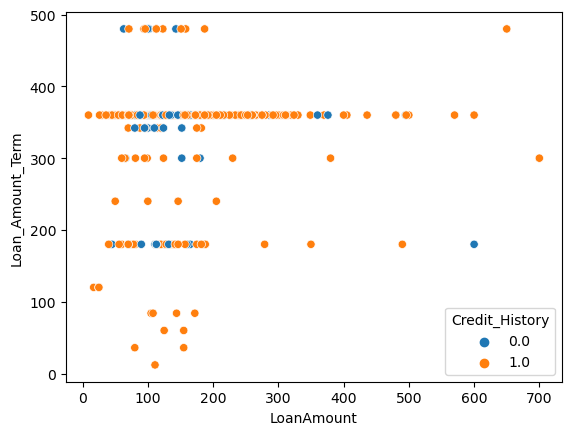

In [255]:
sns.scatterplot(x='LoanAmount',y='Loan_Amount_Term', data = data, hue='Credit_History')
plt.show()

The graph shows applicants loan _Amount_Term and Loan_Amount comparing their loan history, the ability to pay back debts.As we can see most of the applicants pays back their debts, few applicants who were not able to pay back their debts ranges from loan term period of 200 to 480 and the highest loan amount giving to the few applicants ranges from 80 - 620

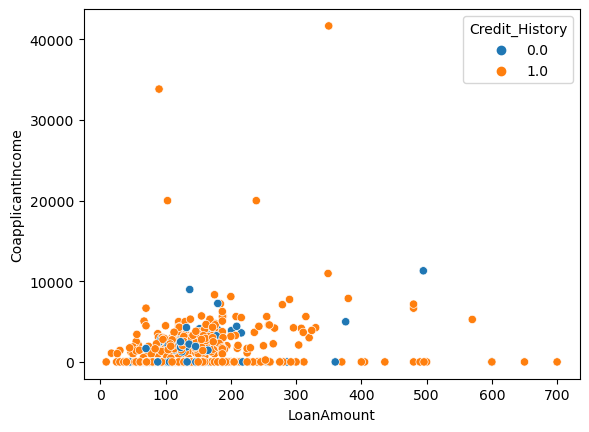

In [256]:
sns.scatterplot(x='LoanAmount',y='CoapplicantIncome', data = data, hue='Credit_History')
plt.show()

The above graph shows CoapplicantsIncome and Loan_Amount comparing their loan history. As we can on the graphs, groups with disposable income who participated with the pricipal applicant have loan history in paying back their debs compare to groups who without loan history or who were not able to pay back their debts

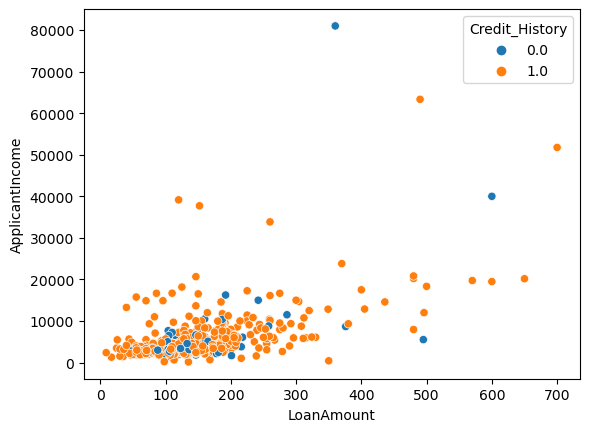

In [257]:
sns.scatterplot(x='LoanAmount',y='ApplicantIncome', data = data, hue='Credit_History')
plt.show()

The above graphs show ApplicantIncome vs LoanAmount comparing their history of paying back loans. As we can see most the applicants with disposable income have a history of paying back their debts falls within 0-20000 disposable income range, within them applicants who were able to pay back their debts are more than applicants who were not able to pay their debts or have not credit history 

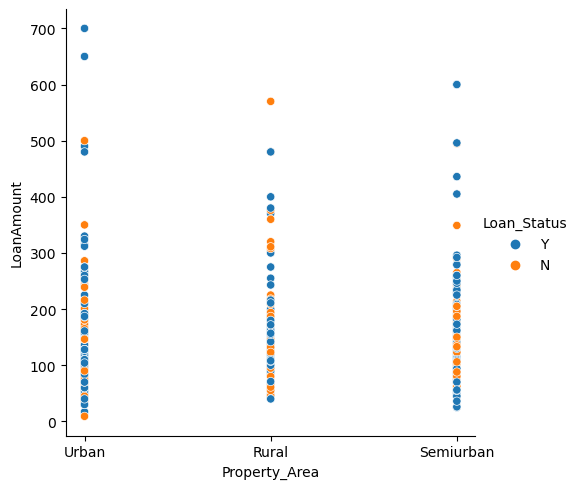

In [258]:
# Comparing between propert_Area  vs Loan Amount and checking their loan status
sns.relplot(x='Property_Area',y ='LoanAmount', data = data, hue='Loan_Status')
plt.show()

Applicants who lives in Urban areas are eligible for higher loan amount than Rural and  semiurban 

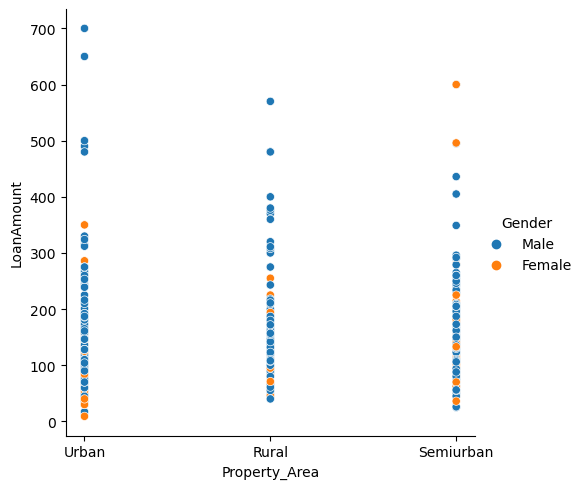

In [259]:
# Comparing between propert_Area  vs Loan Amount and checking their Gender
sns.relplot(x='Property_Area',y ='LoanAmount', data = data, hue='Gender')
plt.show()

The above graph is between Property areas vs Loan Amount and their Gender. According to the result most of the applicants who took the highest amount of loan are from urban areas and they are male. 

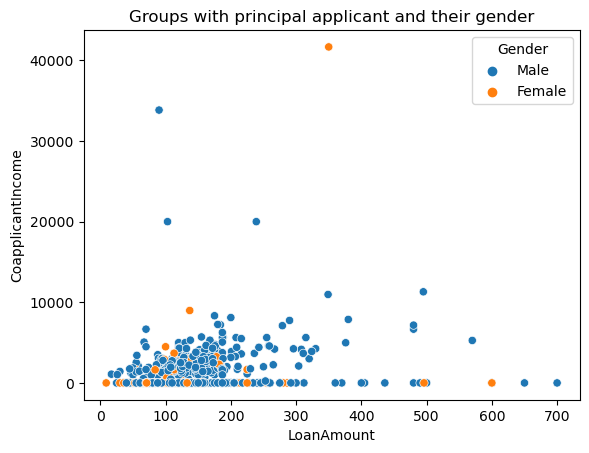

In [260]:
sns.scatterplot(x='LoanAmount',y='CoapplicantIncome', data = data, hue='Gender')
plt.title('Groups with principal applicant and their gender')
plt.show()

According to the graph the group of people with low disposable income participated  with apllicant are mostly male. 

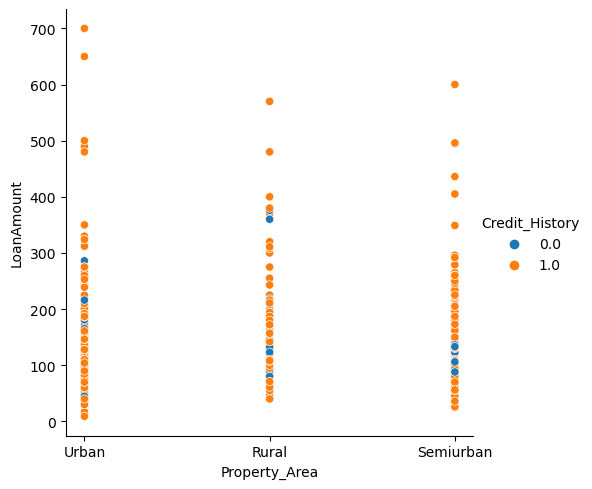

In [261]:
# Comparing between propert_Area  vs Loan Amount and checking their Credit history 
sns.relplot(x='Property_Area',y ='LoanAmount', data = data, hue='Credit_History')
plt.show()

Most people that live in Urban areas have credit history and are eligible for loan, same with Rural_Property_Area and SemiUrban Area collectively. 

# Scatter Matrix Plot 

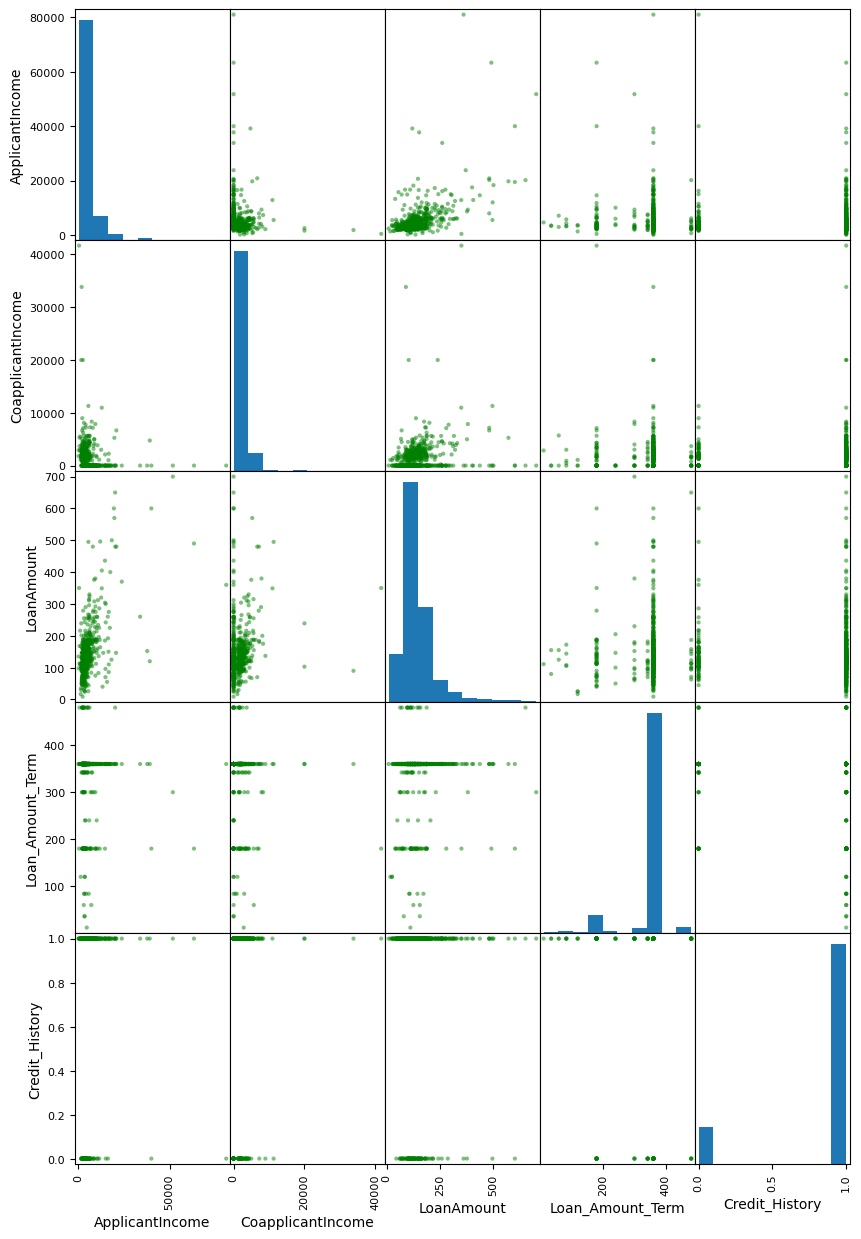

In [262]:
# Importing scatter matrix 
from pandas.plotting import scatter_matrix
scatter_matrix(data,figsize=(10,15),color='g')
plt.show()

Here am just looking at the continuons columns distribution  using  scatter matrix. 

### Encoding all Categorical  Text Columns To Numbers Using One Ordinal Encoder Techniques For Machine Building

In [263]:
obj_columns.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')

In [264]:
from sklearn.preprocessing import OrdinalEncoder

In [265]:
ord_enc = OrdinalEncoder(categories= [['Male','Female'],
                                       ['No','Yes'],
                                       ['Graduate','Not Graduate'],
                                       ['No','Yes']])

encoded_df1 = ord_enc.fit_transform(data[['Gender',
                                          'Married',
                                          'Education',
                                          'Self_Employed']])

In [266]:
encoded_df1

array([[0., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 1.],
       ...,
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 1.]])

In [267]:
# Overiding all trasnformed columns into our main data set 
data['Gender']= encoded_df1
data['Married']= encoded_df1
data['Education']= encoded_df1
data['Self_Employed']= encoded_df1
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,0.0,0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,0.0,0.0,1,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,0.0,0.0,0,0.0,0.0,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,0.0,0.0,0,0.0,0.0,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,0.0,0.0,0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,Urban,Y


According to the 5 first rows of the data frame we can see our text data columns have been transformed to numbers. 

In [268]:
# Label Encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data["Dependents"] = le.fit_transform(data["Dependents"])
data["Property_Area"] = le.fit_transform(data["Property_Area"])
data["Loan_Status"] = le.fit_transform(data["Loan_Status"])
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,0.0,0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2,1
1,0.0,0.0,1,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0,0
2,0.0,0.0,0,0.0,0.0,3000,0.0,66.000000,360.0,1.0,2,1
3,0.0,0.0,0,0.0,0.0,2583,2358.0,120.000000,360.0,1.0,2,1
4,0.0,0.0,0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2,1


I decided to use Label Encoded to transform Dependents and Property_Area columns and target (Loan_Status)

In [269]:
data.shape

(614, 12)

There is no increase in our columns after tranformation using OrdinalEncoder, our columns still remain 12 

In [270]:
data.nunique().to_frame()

,0
Gender,2
Married,2
Dependents,4
Education,2
Self_Employed,2
ApplicantIncome,505
CoapplicantIncome,287
LoanAmount,204
Loan_Amount_Term,11
Credit_History,2


In [271]:
# Checking values counts after transforming our object columns to float and int32 columns
for i in  data:
    print(data[i].value_counts)
    print('*'*75)

<bound method IndexOpsMixin.value_counts of 0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
609    1.0
610    0.0
611    0.0
612    0.0
613    1.0
Name: Gender, Length: 614, dtype: float64>
***************************************************************************
<bound method IndexOpsMixin.value_counts of 0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
609    1.0
610    0.0
611    0.0
612    0.0
613    1.0
Name: Married, Length: 614, dtype: float64>
***************************************************************************
<bound method IndexOpsMixin.value_counts of 0      0
1      1
2      0
3      0
4      0
      ..
609    0
610    3
611    1
612    2
613    0
Name: Dependents, Length: 614, dtype: int32>
***************************************************************************
<bound method IndexOpsMixin.value_counts of 0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
609    1.0
610    0.0
611    0.0
612    0.0
613    1.0
Na

In [272]:
# Checking the datatype 
data.dtypes

Gender               float64
Married              float64
Dependents             int32
Education            float64
Self_Employed        float64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

We observed that Dependents column is still object column type but the data content are in numerical which is fine for our machine learning

# Checking data Distribution

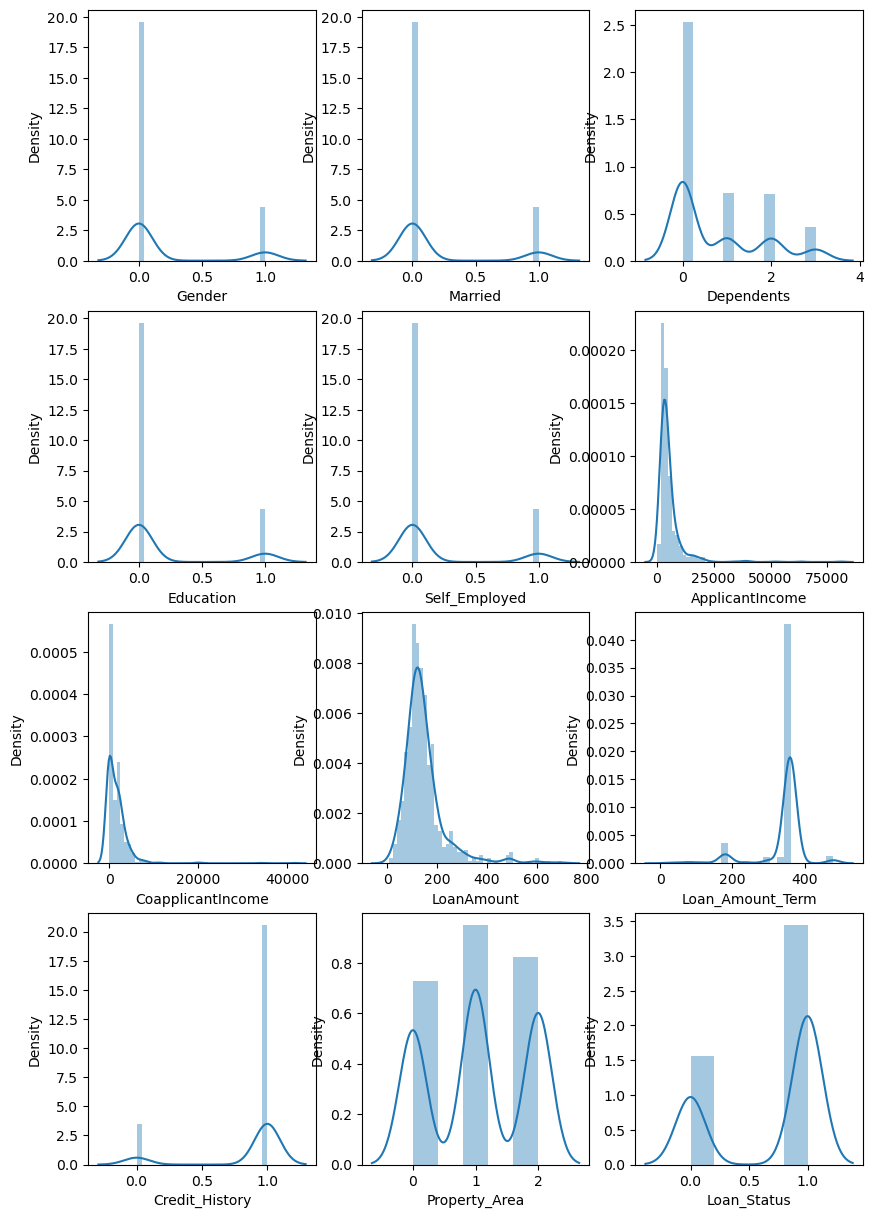

In [273]:
# seeing how the data has been distributed in all the columns 
plt.figure(figsize=(10,15))
plotnumber = 1
for column in data:
    if plotnumber <= 12:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize= 10)
    plotnumber +=1
plt.show()

the above graphs shows the distribution of the data which fellows a bell shape and almost normally distributed. But we can observed skewness to the righ in  ApplicantIncome, same CoapplicantIncome,LoanAmount.Again the data is skew to the left on Loan_Amount_Term and I can also observed outliers. 

# Checking the Outliers 

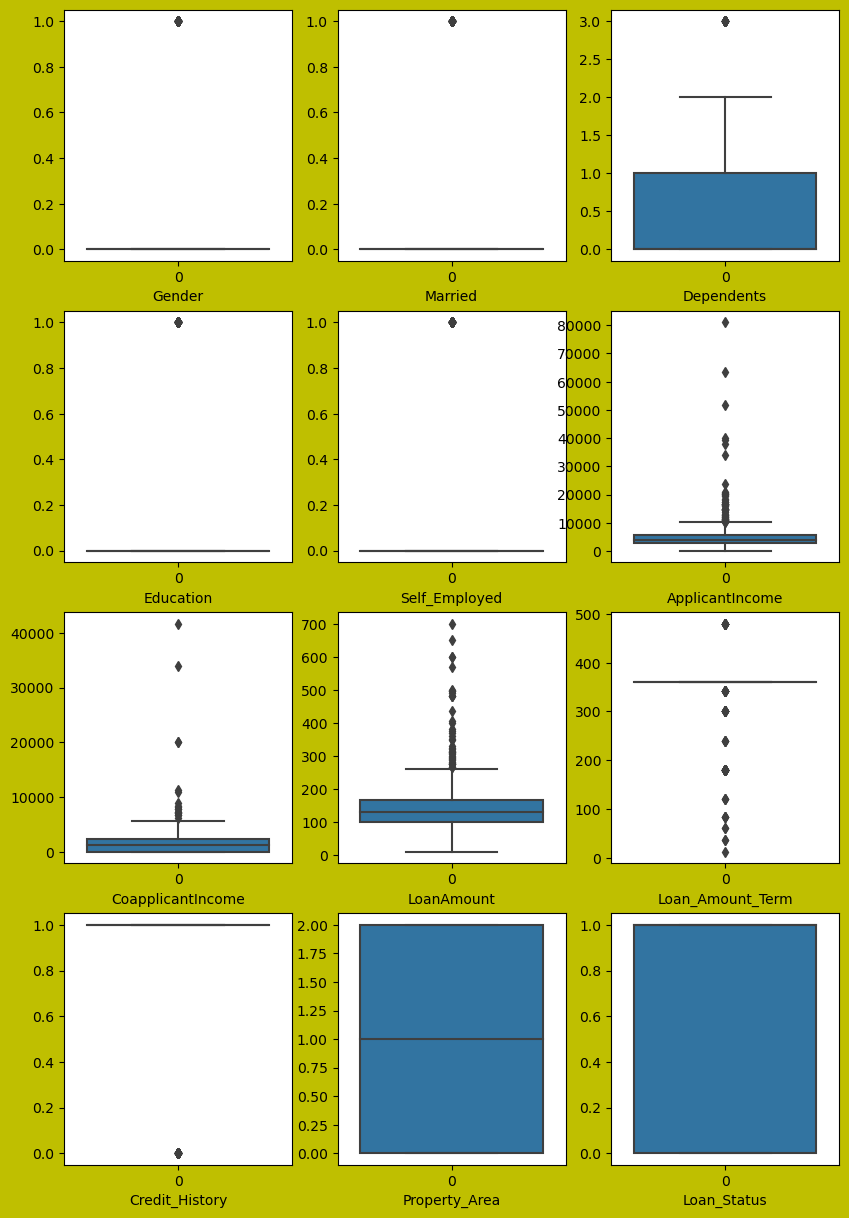

In [274]:
# Checking Outliers 
plt.figure(figsize=(10,15), facecolor='y')
plotnumber = 1
for column in data:
    if plotnumber <= 12:
        ax = plt.subplot(4,3,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize= 10)
    plotnumber +=1
plt.show()

# Using Z Score to remove outliers 

In [275]:
from scipy.stats import zscore
zscore=np.abs(zscore(data))
threshold=3
new_data=data[(zscore<3).all(axis=1)]
print('Shape of the Data Frame:',data.shape)
print('Old Data Frame:', data.shape[0])
print('New Data Frame:', new_data.shape[0])
print('percentage of loss of data by zscore is :',(data.shape[0]-new_data.shape[0])/data.shape[0]*100)

Shape of the Data Frame: (614, 12)
Old Data Frame: 614
New Data Frame: 577
percentage of loss of data by zscore is : 6.026058631921824


After removing the outliers we loss 6% of the data which is not more than 10% of our entire data. This is fine, lets move on to remove skewness. 

In [276]:
# Presence of skewness values -0.5 - +0.5
new_data.skew()

Gender               1.622920
Married              1.622920
Dependents           1.052106
Education            1.622920
Self_Employed        1.622920
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.113132
Loan_Amount_Term    -2.077031
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

We can observed skewness in all the columns expect property_Arean column 

# Applying log Transformation on the continouns data to reduce the skewness 

In [277]:
# This log techniques will keep the data in a similar scale it will not show the skewedness. In other words reduce the skewedness
new_data['ApplicantIncome'] = np.log(new_data['ApplicantIncome'])
new_data['LoanAmount'] = np.log(new_data['LoanAmount'])
new_data['Loan_Amount_Term'] = np.log(new_data['Loan_Amount_Term'])

In [278]:
new_data.skew()

Gender               1.622920
Married              1.622920
Dependents           1.052106
Education            1.622920
Self_Employed        1.622920
ApplicantIncome     -0.207967
CoapplicantIncome    1.350517
LoanAmount          -0.740616
Loan_Amount_Term    -2.725967
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

I have used Log Transformation to reduced the skewness of the data in the montioned numerical columns ApplicantIncome,LoanAmount,Loan_Amount_Term. The reason I did not reduce the skew data on Credit History or Coapplicant to avoid getting Nan on the data. 

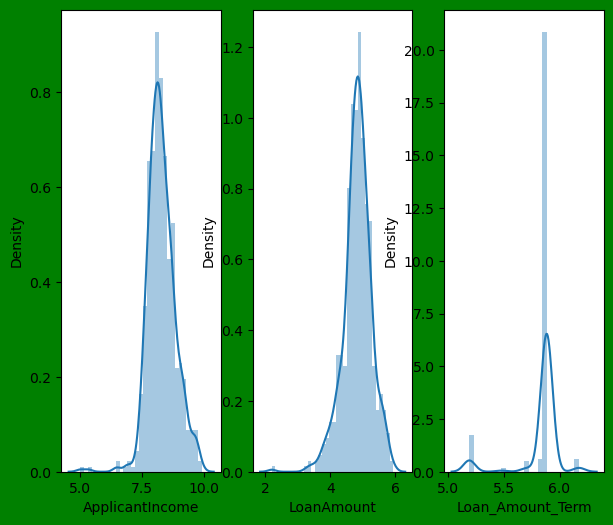

In [279]:
# Checking the distribution after reducing the skewness 
plt.figure(figsize=(7,6), facecolor='g')
plotnumber = 1
for column in new_data[['ApplicantIncome','LoanAmount','Loan_Amount_Term']]:
    if plotnumber <= 3:
        ax = plt.subplot(1,3,plotnumber)
        sns.distplot(new_data[column])
        plt.xlabel(column,fontsize= 10)
    plotnumber +=1
plt.show()

Data distribution looks almost normally distributed and okay after the log transformation and our data is reading for model training 

# Visualizing the correlation between features and target

In [280]:
new_data.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,1.000000,-0.188162,1.000000,1.000000,-0.060313,-0.190543,-0.177969,0.103750,-0.013172,0.026340,-0.017408
Married,1.000000,1.000000,-0.188162,1.000000,1.000000,-0.060313,-0.190543,-0.177969,0.103750,-0.013172,0.026340,-0.017408
Dependents,-0.188162,-0.188162,1.000000,-0.188162,-0.188162,0.106336,-0.026220,0.127095,-0.084608,-0.020288,0.002327,0.017872
Education,1.000000,1.000000,-0.188162,1.000000,1.000000,-0.060313,-0.190543,-0.177969,0.103750,-0.013172,0.026340,-0.017408
Self_Employed,1.000000,1.000000,-0.188162,1.000000,1.000000,-0.060313,-0.190543,-0.177969,0.103750,-0.013172,0.026340,-0.017408
ApplicantIncome,-0.060313,-0.060313,0.106336,-0.060313,-0.060313,1.000000,-0.240951,0.404197,-0.059452,0.027429,-0.010576,-0.001744
CoapplicantIncome,-0.190543,-0.190543,-0.026220,-0.190543,-0.190543,-0.240951,1.000000,0.299655,-0.057200,-0.011102,-0.093505,0.045009
LoanAmount,-0.177969,-0.177969,0.127095,-0.177969,-0.177969,0.404197,0.299655,1.000000,0.059723,-0.013170,-0.103542,-0.023120
Loan_Amount_Term,0.103750,0.103750,-0.084608,0.103750,0.103750,-0.059452,-0.057200,0.059723,1.000000,0.042133,-0.067175,-0.004606
Credit_History,-0.013172,-0.013172,-0.020288,-0.013172,-0.013172,0.027429,-0.011102,-0.013170,0.042133,1.000000,-0.008121,0.560936


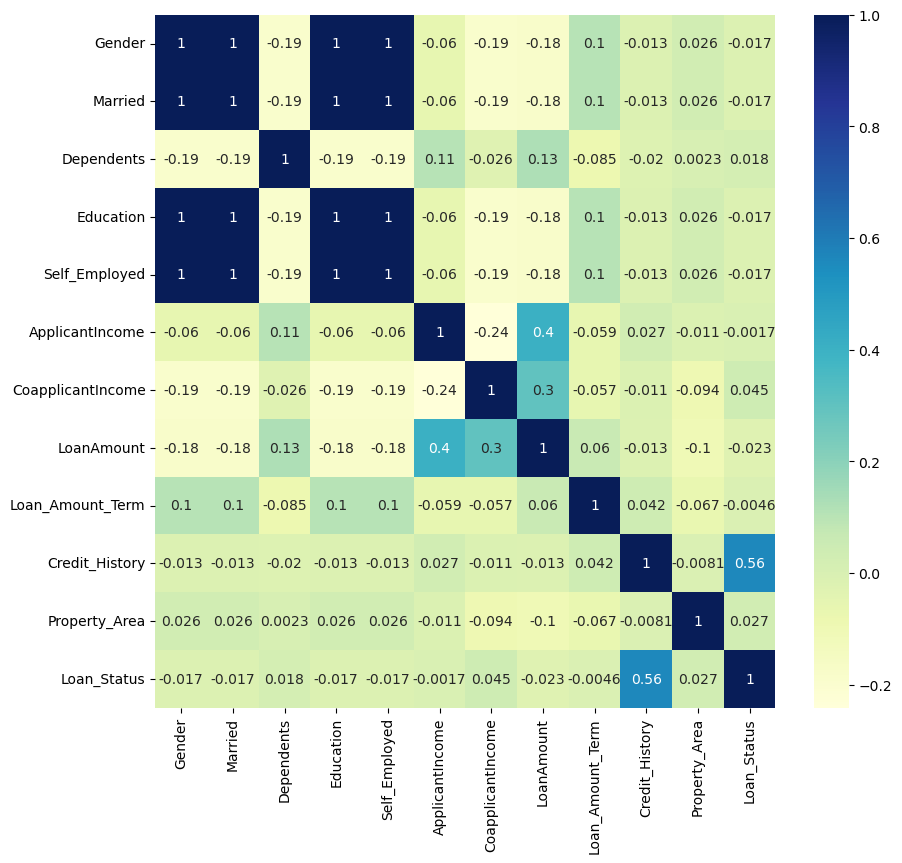

In [281]:
plt.figure(figsize=(10,9))
sns.heatmap(new_data.corr(),annot = True, linecolor="black",annot_kws={'size':10},cmap="YlGnBu")
plt.show()

The above heatmap shows relationship between features, according to the result we can observed that Gender and Married are 100% correlated also do eduction and self employed are 100% correlated which can cause multicollinearity problem. However, in respect to domain knowledge these four features are requirment that might be consider for applicants eligibility when applying for loan. I am not too sure  whether to drop any correlated columns, lets check correlation with target. 

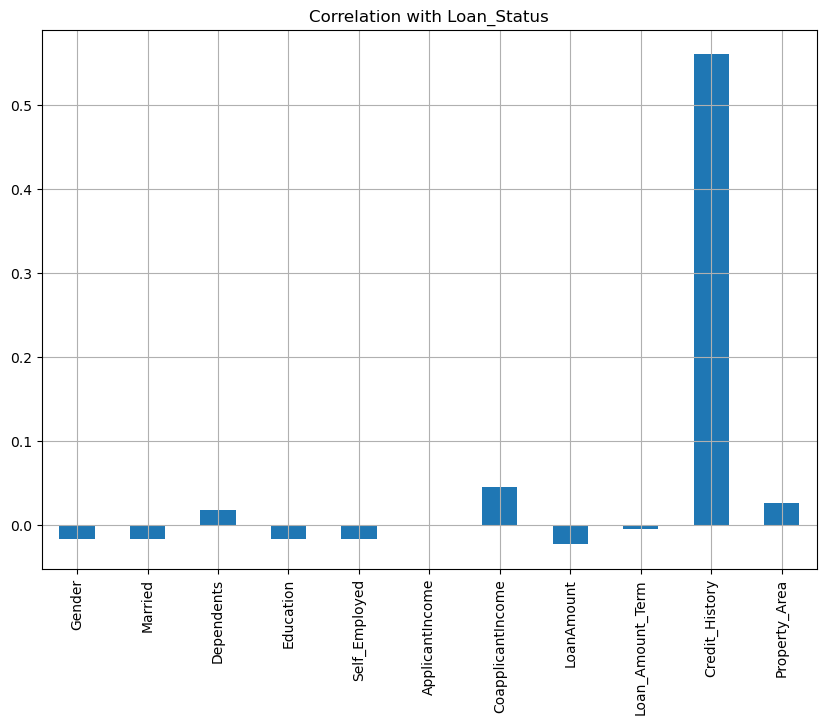

In [282]:
new_data.drop('Loan_Status',axis= 1).corrwith(new_data.Loan_Status).plot(kind = 'bar', grid=True,figsize=(10, 7),
                                                  title='Correlation with Loan_Status')

plt.show()

That above bar plot shows that Loan_Amount_Term has zero relationship with target variable (Loan_status). But I am considering Loan_Amount_Term because in real time Loan_Amount_Term is an important fearture that determine your eligibility when applying for loan. 

Prior to relationship between features we have three proof that Gender and  Married also falls on the zero relationship with target also Education and self_employed have zero relationship with target.  In this case I will be dropping Gender and Education.  



In [288]:
x = new_data.drop(['Gender','Education','Loan_Status'],axis=1)
y= new_data.Loan_Status

# Balancing Target Variable Using SMOT Techniques 

In [290]:
# Counter module to count each class
from collections import Counter
Counter(y)

Counter({1: 398, 0: 179})

In [291]:
# importing over smapling 
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x, y1 = oversample.fit_resample(x, y)
print("The number of classes before fit {}".format(Counter(y)))
print("The number of Classes after fit {}".format(Counter(y1)))

The number of classes before fit Counter({1: 398, 0: 179})
The number of Classes after fit Counter({1: 398, 0: 398})


# Scaling the data and spliting it intoTrain and Test

In [292]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# scaling the data 
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_scaler, y1, test_size = 0.25, random_state = 356)

# Importing the necessary libraries 

In [306]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

In [307]:
dc = DecisionTreeClassifier()
lr = LogisticRegression()
rdf = RandomForestClassifier()
etr = ExtraTreesClassifier()
svc = SVC()
knn = KNeighborsClassifier()
gdb = GradientBoostingClassifier()
ada = AdaBoostClassifier()
xgb = xgb.XGBClassifier() 

models = [dc,lr,rdf,etr,svc,knn,gdb,ada,xgb]

In [309]:
for model in models:
    x_train, x_test, y_train, y_test= train_test_split(x,y1,test_size= 0.25, random_state=657)
    
    model.fit(x_train, y_train)
    model.fit(x_test, y_test)
    y_pred = model.predict(x_test)
      
    
    
    print(f'*************************{model}*************************')
    print ("The Accuracy is: ", accuracy_score(y_test, y_pred)*100)
    print ("The CV score is: ",(cross_val_score(model, x, y1, cv=5).mean())*100) #Cross Validation Score taken as 5
    print ("Difference between Accuracy_Score and CV score is: ",((accuracy_score(y_test, y_pred)*100)-((cross_val_score(model, x, y1, cv=5).mean())*100)))
    print ('\n')
   
    print("The Confusion Matrix is: \n", confusion_matrix(y_test, y_pred))
    print ('\n')
    
       
    print("Classification Report: \n", classification_report(y_test, y_pred))
    print ("="*65)
    print('\n')

*************************DecisionTreeClassifier()*************************
The Accuracy is:  100.0
The CV score is:  75.2617924528302
Difference between Accuracy_Score and CV score is:  24.86320754716982


The Confusion Matrix is: 
 [[ 92   0]
 [  0 107]]


Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        92
           1       1.00      1.00      1.00       107

    accuracy                           1.00       199
   macro avg       1.00      1.00      1.00       199
weighted avg       1.00      1.00      1.00       199



*************************LogisticRegression()*************************
The Accuracy is:  80.90452261306532
The CV score is:  75.51100628930818
Difference between Accuracy_Score and CV score is:  5.39351632375714


The Confusion Matrix is: 
 [[ 55  37]
 [  1 106]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.60      0.7

# The above models result shows that SVM is our best model, simply because it has the least score between cross validation and accuracy 

# Hyper Parameter Tunning 

In [310]:
from sklearn.model_selection import GridSearchCV
param_grid  = { 'C' :[1,5,10,20], # how many errors will can make base on the four options given 
                 'gamma': [0.001, 0.01,0.02,0.002]} 

In [311]:
gridsearch = GridSearchCV(svc, param_grid)
gridsearch.fit(x_train,y_train)
# best param
gridsearch.best_params_

{'C': 20, 'gamma': 0.02}

In [314]:
best_model = SVC(C= 20, gamma =0.02)
best_model.fit(x_train,y_train)
best_model.fit(x_test, y_test)
y_pred = best_model.predict(x_test)


print ("The Accuracy is: ", accuracy_score(y_test, y_pred)*100)
print ("The CV score is: ",(cross_val_score(model, x, y1, cv=5).mean())*100) 
print("The Confusion Matrix is: \n", confusion_matrix(y_test, y_pred))
print ('\n')
print("Classification Report: \n", classification_report(y_test, y_pred))
print ("="*65)
print('\n')

The Accuracy is:  91.4572864321608
The CV score is:  79.03301886792453
The Confusion Matrix is: 
 [[ 78  14]
 [  3 104]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.85      0.90        92
           1       0.88      0.97      0.92       107

    accuracy                           0.91       199
   macro avg       0.92      0.91      0.91       199
weighted avg       0.92      0.91      0.91       199





# After tuning our best model there is an in Accuracy score from  57.78 to 91.45 and Cross Validation score from: 54.26 to 79.03%. 

# AUC ROC Curve

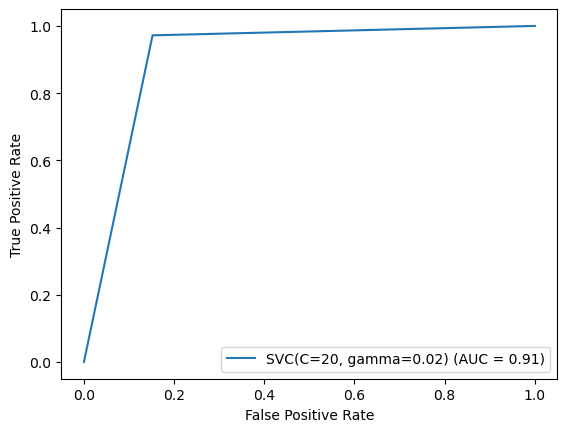

In [315]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc = roc_auc, estimator_name = best_model)
display.plot()

best accuracy score 91%, cv score 79 and auc 91%. This satisfactory 

# Saving Model 

In [317]:
import pickle
filename = 'Loan_Application_Status_BestModel_classification.pkl'
pickle.dump(best_model, open(filename, 'wb'))

# Predicting with saved model

In [316]:
actual=np.array(y_test)
model_pred =np.array(best_model.predict(x_test))
df_ac_pred = pd.DataFrame({"original":actual,"predicted":model_pred},index= range(len(actual)))
df_ac_pred

,original,predicted
0,1,1
1,0,1
2,1,1
3,1,1
4,1,1
...,...,...
194,1,1
195,1,1
196,1,0
197,0,0
